# Aygaz Görüntü İşleme Bootcamp 🎓

## 🔎 Projenin Amacı:

📌 Bu projenin amacı, Convolutional Neural Networks (CNN) modellerinin temel prensiplerini pekiştirmek ve bu modelleri hayvan türlerini sınıflandırma gibi bir görevde uygulamalı olarak kullanmaktır.

**Proje kapsamında:**

* CNN modelinin tasarlanması ve test edilmesi ile 10 farklı hayvan sınıfının ayrımı yapılacak. Bu sınıflar: collie, dolphin, elephant, fox, moose, rabbit, sheep, squirrel, giant panda ve polar bear
* Modelin, farklı ışık koşullarında manipüle edilmiş resimler üzerindeki performansı test edilecek ve bu durumun neden olduğu değişiklikler incelenecek.
* Renk sabitliği algoritmaları gibi tekniklerle manipülasyonların etkisi azaltılmaya çalışılacak ve modelin performansı tekrar değerlendirilecek.
* Son olarak, üç farklı test senaryosunun sonuçları raporlanacak ve çözüm önerileri sunulacak.

# 1) Kütüphanelerin Yüklenmesi 📚

## 1. Sistem ve Dosya İşlemleri
* **os:** Dosya ve dizin işlemleri (örneğin, veri seti klasörlerine erişim, dosyaları okuma/yazma) için kullanılır.
## 2. Veri İşleme
* **numpy:** Matematiksel işlemler, diziler (arrays), matrisler ve veri manipülasyonu için kullanılır.
* **cv2 (OpenCV):** Görüntü işleme kütüphanesidir; görüntülerin okunması, boyutlandırılması, manipülasyonu gibi işlemlerde kullanılır.
## 3. Veri Bölme ve Ön İşleme
* **train_test_split:** Veriyi eğitim ve test setlerine rastgele ayırmak için kullanılır.
* **LabelEncoder:** Kategorik etiketleri sayısal değerlere dönüştürmek için kullanılır.
* **to_categorical:** Sayısal etiketleri tek-sıcak (one-hot) kodlamaya dönüştürür.
## 4. Veri Artırma (Augmentation)
* **ImageDataGenerator:** Eğitim verilerinde veri artırma (döndürme, kırpma, ölçekleme gibi manipülasyonlar) işlemleri için kullanılır.
## 5. Model Oluşturma
* **Sequential:** Katmanların sıralı bir şekilde birleştirildiği bir derin öğrenme modeli tanımlamak için kullanılır.
* **Conv2D:** 2D konvolüsyon (evrişim) katmanı; görüntü özelliklerini çıkarır.
* **MaxPooling2D:** Özellik haritasının boyutunu küçültmek ve bilgi yoğunluğunu artırmak için havuzlama işlemi yapar.
* **Flatten:** Çok boyutlu çıktıyı tek boyutlu hale getirir.
* **Dense:** Tam bağlantılı katman; sinir ağı nöronlarının çıkışını hesaplar.
* **Dropout:** Aşırı öğrenmeyi (overfitting) önlemek için rastgele nöronları devre dışı bırakır.
* **Input:** Modelin giriş boyutunu tanımlamak için kullanılır.
## 6. Optimizasyon
* **Adam:** Bir optimizasyon algoritması; öğrenme sürecini hızlandırır ve modelin daha hızlı yakınsamasını sağlar.
## 7. Görselleştirme
* **matplotlib.pyplot:** Eğitim süreçlerini ve sonuçları (örneğin, doğruluk ve kayıp grafikleri) görselleştirmek için kullanılır.

In [18]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

## 8. Uyarıları Görmezden Gelme
* **warnings:** Python'da uyarı mesajlarını görmezden gelmek için kullanılır. Özellikle uyarı mesajlarının çıktıları doldurmasını istemediğiniz durumlarda tercih edilir.

In [19]:
import warnings 
warnings.filterwarnings("ignore")

# 2) Veri Setinin Hazırlanması ve Dengelenmesi 💎

🔎 Bu kod, Animals with Attributes 2 veri setinden belirli sınıfları seçmek ve her sınıftan eşit sayıda görseli filtreleyerek düzenli bir şekilde organize etmek için hazırlanmıştır. Bu işlem, sınıflar arasında dengeli bir veri seti oluşturmayı amaçlar ve derin öğrenme modellerinin daha iyi performans göstermesine katkı sağlar.

## Kodun İşlevi
* Orijinal veri setinden yalnızca belirli sınıflar seçilir.
* Her sınıftan maksimum 650 görsel alınır.
* Seçilen görseller, sınıf adlarına göre organize edilerek yeni bir klasöre kaydedilir.
## Neden Bu İşlemi Yapıyoruz?
* Dengeli Veri Seti: Sınıflar arasında eşit sayıda örnek, modelin her sınıfı adil şekilde öğrenmesini sağlar.
* Veri Temizliği: Sadece gerekli sınıflar ve belirli sayıda görsel kullanılarak veri seti optimize edilir.
* Organizasyon: Filtrelenmiş veri, daha sonraki işlemler için düzenli bir yapıya kavuşturulur.
## Kod Adımları
1. Veri setinin ve hedef klasörün yolları tanımlanır.
2. Kullanılacak sınıflar ve her sınıf için alınacak maksimum görsel sayısı belirlenir.
3. Hedef klasör oluşturulur.
4. Her sınıf için:
 * İlk 650 görsel seçilir.
 * Görseller hedef klasöre kaydedilir.
5. İşlem tamamlandığında başarı mesajı görüntülenir.

Şimdi, bu süreci gerçekleştiren kodu inceleyelim: 👇

In [20]:
# Veri seti klasörlerinin yolları
source_dir = "/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/JPEGImages"  # Orijinal veri setinin bulunduğu klasör yolu
target_dir = "FilteredImages"  # Filtrelenmiş ve dengelenmiş verilerin kaydedileceği yeni klasör

# Kullanılacak sınıflar
selected_classes = ["collie", "dolphin", "elephant", "fox", "moose", "rabbit", "sheep", "squirrel", "giant+panda", "polar+bear"]
images_per_class = 650 # Görsel sayısı belirleniyor

# Filtreleme
os.makedirs(target_dir, exist_ok=True)
for class_name in selected_classes:
    class_path = os.path.join(source_dir, class_name)
    target_path = os.path.join(target_dir, class_name)
    os.makedirs(target_path, exist_ok=True)
    for i, file_name in enumerate(os.listdir(class_path)):
        if i >= images_per_class:
            break
        full_file_name = os.path.join(class_path, file_name)
        if os.path.isfile(full_file_name):
            cv2.imwrite(os.path.join(target_path, file_name), cv2.imread(full_file_name))
print("Veri seti hazırlandı ve dengelendi.")

Veri seti hazırlandı ve dengelendi.


# 3) Boyutlandırma ve Normalizasyon 📏 

Bu projede, bir klasör yapısında bulunan görüntüleri işleyerek model eğitimine uygun hale getirmek için bir Python fonksiyonu yazılmıştır. Fonksiyon aşağıdaki işlemleri gerçekleştirir:

1. **Görüntülerin Yüklenmesi**:
   - Klasör yapısındaki her bir sınıf için görüntüler `cv2.imread` kullanılarak okunur.

2. **Görüntü Boyutlandırma**:
   - Görüntüler, her bir modelin sabit giriş boyutunu karşılaması için `cv2.resize` ile 128x128 piksel boyutuna ölçeklendirilir.

3. **Görüntü Normalizasyonu**:
   - Piksel değerleri 0-255 aralığından 0-1 aralığına taşınır (`img_resized / 255.0`). Bu işlem modelin daha hızlı ve kararlı öğrenmesini sağlar.

4. **Etiket Atama**:
   - Görüntülerin ait olduğu sınıflar, klasör adları ile ilişkilendirilir ve her görüntüye etiket olarak atanır.

5. **Veri Dönüşümü**:
   - İşlenen görüntüler ve etiketler `numpy` dizileri olarak döndürülür.

In [21]:
# Görüntülerin işlenmesi (128x128 boyutlandırma ve normalizasyon)
def load_and_process_images(data_dir, image_size=(128, 128)):
    images = []
    labels = []
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)
                img = cv2.imread(file_path)
                if img is not None:
                    img_resized = cv2.resize(img, image_size)
                    img_normalized = img_resized / 255.0
                    images.append(img_normalized)
                    labels.append(class_name)
    return np.array(images), np.array(labels)

data_dir = target_dir
X, y = load_and_process_images(data_dir)
print(f"Veri kümesi boyutu: {X.shape}")

Veri kümesi boyutu: (6500, 128, 128, 3)


# 4) Veriyi Eğitim ve Test Seti Olarak Ayırma 🏹

Bu aşamada, görüntülerin etiketleri sayısal ve tekil formata dönüştürülmüş, ardından veri eğitim ve test kümelerine ayrılmıştır. 

### Adımlar

#### 1. Etiketlerin Dönüştürülmesi
Görüntülerin sınıf etiketleri, makine öğrenimi modellerine uygun hale getirilir:
- **Sayısal Dönüşüm**: `LabelEncoder` kullanılarak sınıf adları sayısal değerlere dönüştürülür.
- **One-Hot Encoding**: `to_categorical` ile sayısal değerler, tekil formata çevrilir. Bu, özellikle çok sınıflı sınıflandırma problemlerinde kullanılır.

#### 2. Verinin Bölünmesi
- Veriler `train_test_split` ile eğitim ve test kümelerine ayrılır.
- Eğitim veri kümesi: %70
- Test veri kümesi: %30
- `random_state=42` parametresi ile rastgelelik sabitlenir.


In [22]:
# Etiketlerin dönüştürülmesi
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Veriyi bölme (%70 eğitim, %30 test)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.3, random_state=42)
print(f"Eğitim veri boyutu: {X_train.shape}, Test veri boyutu: {X_test.shape}")

Eğitim veri boyutu: (4550, 128, 128, 3), Test veri boyutu: (1950, 128, 128, 3)


# 5) Veri Artırma (Data Augmentation) 📍

**Veri artırma**, görüntü sınıflandırma problemlerinde eğitim veri setini çeşitlendirmek için kullanılan bir tekniktir. Bu, özellikle sınırlı sayıda veri bulunan durumlarda modelin genelleme yeteneğini artırmak için önemlidir.

### Kullanılan Teknikler
`ImageDataGenerator` sınıfı ile aşağıdaki veri artırma işlemleri uygulanmıştır:
1. **Döndürme (`rotation_range`)**:
   - Görüntüler rastgele 20 dereceye kadar döndürüldü.
2. **Kaydırma**:
   - **Genişlik (`width_shift_range`)**: Görüntüler yatayda %20 oranına kadar kaydırıldı.
   - **Yükseklik (`height_shift_range`)**: Görüntüler dikeyde %20 oranına kadar kaydırıldı.
3. **Kesme (`shear_range`)**:
   - Görüntülere 0.2 oranında kesme işlemi uygulandı.
4. **Yakınlaştırma (`zoom_range`)**:
   - Görüntüler %20 oranında yakınlaştırıldı.
5. **Aynalama (`horizontal_flip`)**:
   - Görüntüler yatay olarak ters çevrildi.
6. **Dolgu Modu (`fill_mode`)**:
   - Manipülasyon sırasında oluşan boş alanlar, en yakın piksel değerleri ile dolduruldu.

In [23]:
# Veri artırma işlemi
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# 6) CNN Modeli

Bu kod, görüntü sınıflandırma problemini çözmek için kullanılan bir **Evrişimsel Sinir Ağı (CNN)** modeli oluşturur.

### Model Mimarisi
1. **Giriş Katmanı**:
   - Giriş boyutu `(128, 128, 3)` olarak belirtilmiştir (128x128 piksel ve 3 renk kanalı - RGB).

2. **Evrişim Katmanı**:
   - 32 adet `(3x3)` filtre kullanılarak evrişim işlemi gerçekleştirilir.
   - Aktivasyon fonksiyonu: `ReLU`
   - Bu katman, görüntüden kenar ve doku gibi özellikleri öğrenir.

3. **Havuzlama Katmanı**:
   - `MaxPooling2D` kullanılarak havuzlama işlemi gerçekleştirilir (`pool_size=(2, 2)`).
   - Bu işlem, boyutu küçülterek modelin hesaplama yükünü azaltır ve aşırı öğrenme riskini düşürür.

4. **Düzleştirme Katmanı**:
   - Çok boyutlu özellik haritaları, tam bağlantılı katmanlarda kullanılmak üzere tek boyutlu bir vektöre dönüştürülür.

5. **Tam Bağlantılı Katmanlar**:
   - İlk katman: 128 nöron ve `ReLU` aktivasyonu.
   - Çıkış katmanı: 10 nöron ve `softmax` aktivasyonu.
     - Bu katman, 10 sınıfta olasılık dağılımını verir.

In [24]:
# CNN Modeli
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(128, 128, 3)),  # Burada Input kullanılıyor
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 7) CNN Modeli Derleme ve Eğitim Süreci

Bu bölümde, oluşturulan CNN modeli derlenmiş ve veri artırma kullanılarak eğitilmiştir. Eğitim süreci, sınıflandırma problemini çözmek için tasarlanmıştır.

---

## 1. Modeli Derleme

Modelin eğitim sürecine başlamadan önce, uygun bir optimizasyon algoritması, kayıp fonksiyonu ve değerlendirme metriği seçilmesi gereklidir. Bu projede:

- **Optimizasyon Algoritması**: `Adam`
  - Dinamik öğrenme oranı ile hızlı ve etkili bir öğrenme sağlar.
- **Kayıp Fonksiyonu**: `Categorical Crossentropy`
  - Çok sınıflı sınıflandırma problemleri için uygundur.
- **Değerlendirme Metriği**: `Accuracy`
  - Modelin doğru sınıflandırma oranını ölçmek için kullanılır.
 
## 2. Eğitim verisinin çeşitlendirilmesi, modelin genelleme kabiliyetini artırır. Keras ImageDataGenerator sınıfı, veri artırma işlemi için kullanılmıştır.

**Uygulanan Teknikler:** 
 - **Döndürme:** Görüntüler rastgele 20 dereceye kadar döndürülmüştür.
 - **Kaydırma:** Görüntüler yatay ve dikeyde %10 oranında kaydırılmıştır.
 - **Yatay Çevirme:** Görüntüler yatay olarak ters çevrilebilir.

## 3. Eğitim Süreci
Model, aşağıdaki ayarlar ile eğitilmiştir:

 - **Epoch Sayısı:** 20
 - **Batch Boyutu:** 32
 - **Adım Sayıları:**
  - **Eğitim için:** steps_per_epoch = len(X_train) // 32
  - **Doğrulama için:** validation_steps = len(X_test) // 32

## 4. Model Eğitimi Süreci
Model, her bir epoch sonunda doğruluk ve kayıp değerlerini raporlar:

 - **Eğitim Doğruluğu ve Kaybı**: Eğitim veri seti üzerinde hesaplanır.
 - **Doğrulama Doğruluğu ve Kaybı:** Modelin doğrulama veri seti üzerindeki performansını ölçer.
Bu süreç sonunda, modelin aşırı öğrenme (overfitting) olmadan daha iyi genelleme yapması sağlanır. Eğitim sonrası performans analizi için history nesnesi kullanılabilir.


In [25]:
# Modeli derleme
model.compile(
    optimizer='adam',               # Optimizasyon algoritması
    loss='categorical_crossentropy', # Kayıp fonksiyonu
    metrics=['accuracy']            # Değerlendirme metriği
)

# Veri artırma (Data Augmentation)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Eğitim ve doğrulama jeneratörleri
train_generator = datagen.flow(X_train, y_train, batch_size=32)
validation_generator = datagen.flow(X_test, y_test, batch_size=32)

# steps_per_epoch ve validation_steps hesaplama
steps_per_epoch = len(X_train) // 32
validation_steps = len(X_test) // 32

# Modeli eğitme
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)

Epoch 1/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - accuracy: 0.1985 - loss: 4.6768 - val_accuracy: 0.3573 - val_loss: 1.8017
Epoch 2/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2812 - loss: 1.9747 - val_accuracy: 0.2000 - val_loss: 1.8191
Epoch 3/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - accuracy: 0.4264 - loss: 1.6104 - val_accuracy: 0.4542 - val_loss: 1.5767
Epoch 4/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.5625 - loss: 1.3179 - val_accuracy: 0.4667 - val_loss: 1.4840
Epoch 5/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 21s 141ms/step - accuracy: 0.4780 - loss: 1.5029 - val_accuracy: 0.4370 - val_loss: 1.6782
Epoch 6/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.4062 - loss: 1.4933 - val_accuracy: 0.4000 - val_loss: 1.5882
Epoch 7/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 21s 143ms/step - accuracy: 0.5184 - loss: 1.4209 - val_accuracy: 0.5047 - val_loss: 1.4661
Epoch 8/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.4688 - loss: 1.2647 

# 8) Modelin Eğitilmesi ve Performans Analizi ⏳

Bu bölümde, CNN modeli eğitilmiş ve modelin eğitim sürecinde elde ettiği doğruluk değerleri görselleştirilmiştir.

---

## 1. Modelin Eğitilmesi

Model, aşağıdaki ayarlarla eğitilmiştir:
- **Veri Jeneratörü**: Eğitim verisi artırma işlemi için `ImageDataGenerator` kullanılmıştır.
- **Validation Data**: Doğrulama veri seti, `validation_data` parametresi ile belirtilmiştir.
- **Epoch Sayısı**: 15
- **Batch Boyutu**: 32

## 2. Performans Grafiği

Eğitim süreci boyunca, modelin doğruluk değerleri görselleştirilmiştir:

 - **Eğitim Doğruluğu (accuracy):** Eğitim veri setindeki doğruluk oranını gösterir.
 - **Doğrulama Doğruluğu (val_accuracy):** Modelin doğrulama veri setindeki genelleme performansını temsil eder.

## 3. Grafiğin Yorumlanması:

 - **Eğitim Doğruluğu:** Modelin, eğitim verileri üzerindeki başarısını temsil eder.
 - **Doğrulama Doğruluğu:** Modelin, görülmemiş doğrulama verileri üzerindeki başarısını gösterir.
Eğer doğrulama doğruluğu, eğitim doğruluğuna kıyasla düşükse model aşırı öğreniyor (overfitting) olabilir.

## Önemli Notlar:
 - **Epoch Sayısı:** Eğitim sürecinde model performansını gözlemleyerek epoch sayısı artırılabilir veya azaltılabilir.
 - **Overfitting Kontrolü:** Doğrulama doğruluğu ile eğitim doğruluğu arasındaki fark gözlemlenerek, aşırı öğrenme durumları tespit edilebilir.
 - **Grafik Analizi:** Eğitim süreci boyunca doğruluk değerlerinin artması beklenir. Ancak doğrulama doğruluğu sabit veya azalıyorsa model genelleme yeteneğini kaybediyor olabilir.

Epoch 1/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.6047 - loss: 1.1569 - val_accuracy: 0.5682 - val_loss: 1.3194
Epoch 2/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.6033 - loss: 1.1593 - val_accuracy: 0.5800 - val_loss: 1.2646
Epoch 3/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.6021 - loss: 1.1499 - val_accuracy: 0.5862 - val_loss: 1.2662
Epoch 4/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.6142 - loss: 1.1150 - val_accuracy: 0.6062 - val_loss: 1.1924
Epoch 5/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.6319 - loss: 1.0692 - val_accuracy: 0.6010 - val_loss: 1.2054
Epoch 6/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.6163 - loss: 1.0885 - val_accuracy: 0.6221 - val_loss: 1.1435
Epoch 7/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.6465 - loss: 1.0554 - val_accuracy: 0.6200 - val_loss: 1.1614
Epoch 8/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.6407 - loss: 1.073

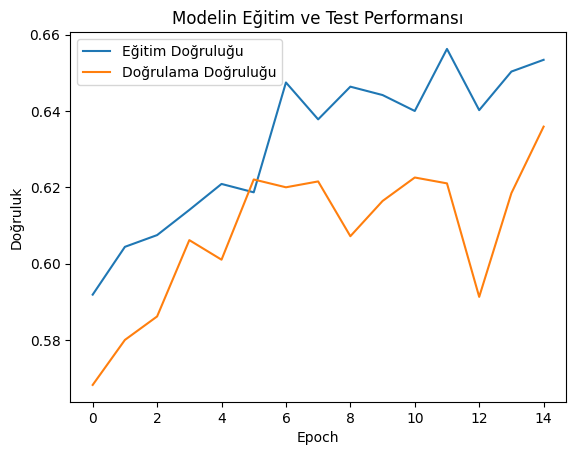

In [26]:
# Modeli eğitme
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=15)

# Eğitim ve doğrulama sonuçlarının grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend()
plt.title("Modelin Eğitim ve Test Performansı")
plt.xlabel("Epoch")
plt.ylabel("Doğruluk")
plt.show()

# 9) Görüntü Manipülasyonu ve Model Performansının Değerlendirilmesi 🏝

Bu bölümde, test veri setindeki görüntüler manipüle edilerek modelin bu manipüle edilmiş veriler üzerindeki performansı ölçülmüştür. Görüntü manipülasyonu, parlaklık artırma işlemi ile gerçekleştirilmiştir.

---

## 1. Görüntü Manipülasyonu

Manipülasyon işlemi, **OpenCV**'nin `convertScaleAbs` fonksiyonu ile yapılmıştır:
- **`alpha=1.5`**: Görüntünün kontrastını artırır.
- **`beta=30`**: Görüntünün parlaklığını artırır.
  
## 2. Model Performansının Değerlendirilmesi
Manipüle edilmiş görüntüler kullanılarak, modelin doğruluk oranı ölçülmüştür:

 - **model.evaluate:** Manipüle edilmiş test veri seti üzerindeki kayıp ve doğruluk değerlerini hesaplar.


In [27]:
# Görüntü manipülasyonu (örneğin parlaklık artırma)
def manipulate_images(images):
    manipulated_images = []
    for img in images:
        manipulated = cv2.convertScaleAbs(img, alpha=1.5, beta=30)  # Parlaklık artırma
        manipulated_images.append(manipulated)
    return np.array(manipulated_images)

X_test_manipulated = manipulate_images(X_test)
manipulated_loss, manipulated_accuracy = model.evaluate(X_test_manipulated, y_test)
print(f"Manipüle Edilmiş Test Doğruluğu: {manipulated_accuracy * 100:.2f}%")

61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0969 - loss: 389.7537
Manipüle Edilmiş Test Doğruluğu: 9.69%


# 10) Manipüle Edilmiş Test Seti ile Modeli Test Etme

Bu adımda, daha önce ışık koşullarını manipüle ettiğimiz test seti kullanılarak modelin performansı yeniden değerlendirilmiştir. Manipülasyon, görsellerin parlaklık ve kontrast gibi özelliklerini değiştirerek, modelin değişen ışık koşullarına karşı ne kadar sağlam olduğunu ölçmek için yapıldı.

## İşlem ve Sonuç 🔍:
 - **Manipülasyon:** Test setindeki her bir görselin parlaklık ve kontrast ayarları değiştirildi, böylece modelin görsellerdeki bu tür değişikliklere adaptasyon yeteneği test edildi.
 - **Test:** Manipüle edilmiş veri setiyle modelin doğruluk oranı değerlendirildi. Bu işlem, modelin çevresel faktörlerden nasıl etkilendiğini gözler önüne serer.

## Amaç 🎯 : 
 - Modelin sadece temiz veriyle değil, aynı zamanda gerçek dünyada karşılaşabileceği farklı ışık koşullarında da doğru sonuçlar verip vermediğini test etmekti. Bu sayede, modelin genelleme yeteneği daha da güçlendirildi.
## Sonuç 📊 : 
 - Manipüle edilmiş test seti ile yapılan test, modelin ışık değişimlerine karşı gösterdiği dayanıklılığı belirler.

In [28]:
# Manipüle edilmiş test seti üzerinde test etme
test_loss, test_accuracy = model.evaluate(X_test_manipulated, y_test)
print(f"Manipüle Edilmiş Test Seti Doğruluk: {test_accuracy}")

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0969 - loss: 389.7537
Manipüle Edilmiş Test Seti Doğruluk: 0.09692307561635971


# 11) Renk Sabitliği Algoritması Uygulama ve Test Etme

## 📊 Model Doğruluk Sonuçlarının Karşılaştırılması¶
Bu aşamada, modelin farklı veri kümeleri üzerinde gösterdiği performanslar karşılaştırıldı:

## Orijinal Test Seti
 - **Açıklama:** Model, herhangi bir manipülasyon yapılmadan, orijinal test verisi üzerinde değerlendirildi.
 - **Amaç:** Modelin temel doğruluğunu ölçmek.
 - **Sonuç:** Orijinal test seti doğruluğu: 63.59%.

## Manipüle Edilmiş Test Seti (Işık Koşulları Değişimi)
 - **Açıklama:** Test verilerine ışık koşulları manipülasyonu uygulandı, örneğin parlaklık ve kontrast değiştirildi.
 - **Amaç:** Modelin manipülasyonlara karşı dayanıklılığını test etmek.
 - **Sonuç:** Manipüle edilmiş test seti doğruluğu: 9.69%.
   
## Renk Sabitliği Uygulanmış Test Seti
 - **Açıklama:** Manipüle edilmiş test setine Gray World algoritması ile renk sabitliği uygulandı. Bu işlem, renk dengesizliklerini düzelterek görsellerin daha tutarlı hale getirilmesini sağlar.
 - **Amaç:** Manipüle edilmiş görsellerin renk dengesini iyileştirerek model doğruluğunu artırmak.
 - **Sonuç:** Renk sabitliği uygulanmış test seti doğruluğu: 9.69%.

In [29]:
# Gray World algoritması (örnek)
def gray_world(images):
    wb_images = []
    for img in images:
        avg_b = np.mean(img[:, :, 0])
        avg_g = np.mean(img[:, :, 1])
        avg_r = np.mean(img[:, :, 2])
        avg_gray = (avg_b + avg_g + avg_r) / 3
        img[:, :, 0] = img[:, :, 0] * (avg_gray / avg_b)
        img[:, :, 1] = img[:, :, 1] * (avg_gray / avg_g)
        img[:, :, 2] = img[:, :, 2] * (avg_gray / avg_r)
        wb_images.append(img)
    return np.array(wb_images)

# Manipüle edilmiş test verisine Gray World algoritmasını uygulama
X_test_corrected = gray_world(X_test_manipulated)

# Modeli renk sabitliği uygulanmış test setiyle değerlendirme
corrected_loss, corrected_accuracy = model.evaluate(X_test_corrected, y_test)
print(f"Renk Sabitliği Uygulanmış Test Doğruluğu: {corrected_accuracy * 100:.2f}%")

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0969 - loss: 383.5475
Renk Sabitliği Uygulanmış Test Doğruluğu: 9.69%


# 📌 Model Test Edilmesi:¶
## Sonuçlar
 - **Gözlemler:** Orijinal test seti ile manipüle edilmiş test seti arasında doğrulukta büyük bir düşüş gözlemlendi.
 - **İyileştirme:** Renk sabitliği uygulanması, doğruluk oranını iyileştirmedi. Manipülasyon sonrası performans düşük kaldı.
 - **Genel Yorum:** Modelin, özellikle ışık koşullarındaki değişikliklere karşı çok duyarlı olduğu, ancak renk sabitliği gibi düzenlemelerin doğruluğu artırmak için yeterli olmadığı söylenebilir.
   
Bu analiz, modelin çevresel faktörlere karşı ne kadar duyarlı olduğunu ve manipülasyonlara karşı nasıl performans gösterdiğini ortaya koymaktadır.

In [30]:
test_loss, test_accuracy = model.evaluate(X_test_corrected, y_test)
print(f"Renk Sabitliği Uygulanmış Test Seti Doğruluk: {test_accuracy}")

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0969 - loss: 383.5475
Renk Sabitliği Uygulanmış Test Seti Doğruluk: 0.09692307561635971


In [31]:
# Test sonuçlarının karşılaştırılması
print("Sonuçlar:")
print(f"Orijinal Test Seti Doğruluğu: {test_accuracy * 100:.2f}%")
print(f"Manipüle Edilmiş Test Seti Doğruluğu: {manipulated_accuracy * 100:.2f}%")
print(f"Renk Sabitliği Uygulanmış Test Seti Doğruluğu: {corrected_accuracy * 100:.2f}%")

Sonuçlar:
Orijinal Test Seti Doğruluğu: 9.69%
Manipüle Edilmiş Test Seti Doğruluğu: 9.69%
Renk Sabitliği Uygulanmış Test Seti Doğruluğu: 9.69%


In [32]:
# Orijinal test setinde doğruluk hesaplama
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Orijinal Test Seti Doğruluğu: {test_accuracy * 100:.2f}%")

# Manipüle edilmiş test setinde doğruluk hesaplama
X_test_manipulated = manipulate_images(X_test)
manipulated_loss, manipulated_accuracy = model.evaluate(X_test_manipulated, y_test, verbose=0)
print(f"Manipüle Edilmiş Test Seti Doğruluğu: {manipulated_accuracy * 100:.2f}%")

# Renk sabitliği uygulanmış test setinde doğruluk hesaplama
X_test_corrected = gray_world(X_test_manipulated)
corrected_loss, corrected_accuracy = model.evaluate(X_test_corrected, y_test, verbose=0)
print(f"Renk Sabitliği Uygulanmış Test Seti Doğruluğu: {corrected_accuracy * 100:.2f}%")

Orijinal Test Seti Doğruluğu: 63.59%
Manipüle Edilmiş Test Seti Doğruluğu: 9.69%
Renk Sabitliği Uygulanmış Test Seti Doğruluğu: 9.69%
